In [3]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import csv
import numpy as np
import os

In [167]:
def get_size(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    total = 0
    for row in csvreader:
        total = total +1
    file.close()
    return total
    
def get_header(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    header = next(csvreader)[0].split(";")
    return header

def get_row_normalized(file_name,row_name):
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    first_val = float(next(csvreader)[0].split(";")[idx])
    print('first_val: {}'.format(first_val))
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            x.append(i)
            y.append(first_val - float(itm))
    file.close()
    return np.array(x),np.array(y)

def get_row(file_name,row_name):
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            val = float(itm)
            if val == 0:
                x.append(i)
                y.append(np.nan)
            else:
                x.append(i)
                y.append(float(itm))
    file.close()
    return np.array(x),np.array(y)

def plot_file(file_name,items = None):
    if items == None:
        items = get_header(file_name)

    for item in items:
        if item == 'Remaining_space':
            x,row_i = get_row_normalized(file_name,item)
        else:
            x,row_i = get_row(file_name,item)
        plt.plot(x, row_i, label = item)
        print('got {}'.format(item))
    # naming the x axis
#     plt.xlabel('x - axis')
#     # naming the y axis
#     plt.ylabel('y - axis')
    # giving a title to my graph
    plt.title(os.path.basename(file_name))
    # show a legend on the plot
    plt.legend()
    plt.savefig('foo2.png')
    # function to show the plot
    plt.show()

    
def plot_row(p, file_name,item,name = None):
    if not item in get_header(file_name):
        print("Error {} not found in {}".format(item,file_name))
        return p

    if item == 'Remaining_space':
        x,row_i = get_row_normalized(file_name,item)
    else:
        x,row_i = get_row(file_name,item)
    if name == None:
        name = os.path.basename(file_name)
    p.plot(x, row_i, label = name)
    return p

def plot_all(title,files,column,filter_files,output_file):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
    #         print(f)
            plot_row(ax,f,column)


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()
    
def plot_all_multi(title,files,columns,filter_files,output_file):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
            for column in columns:
                plot_row(ax,f,column,name="{}_{}".format(os.path.basename(f),column))


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()

In [134]:
path_folder = "benchmarks"
os.listdir(path_folder)

['v1', '.DS_Store']

In [135]:
file_size_threshold = 10000
def get_files(path):
    files = {}
    l = []
    for f in os.listdir(path):
        file = os.path.join(path,f)
        if os.path.isdir(file):
            items = get_files(file)
            if len(items)>0:
                files[f] = items
        elif f.endswith(".csv"):
            size = get_size(file)
            if size >= file_size_threshold:
                l.append(file)
    if len(files)>0:
        return files
    else:
        return l


In [136]:
items = get_files(path_folder)
items['v1']['benchmaks_mac_16gb']['21']

['benchmarks/v1/benchmaks_mac_16gb/21/macpro_20220321_12_55_53_size_benchmark_1M_checkout_50_1000p3.csv',
 'benchmarks/v1/benchmaks_mac_16gb/21/macpro_20220321_12_55_53_time_benchmark_1M_checkout_50_1000p3.csv']

In [137]:

all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']

files_to_process = []
for file in all_files:
    size = get_size(file)
    if size >= file_size_threshold:
        print(file)
        print(size)
        files_to_process.append(file)
        

benchmarks/v1/benchmaks_mac_16gb/21/macpro_20220321_12_55_53_size_benchmark_1M_checkout_50_1000p3.csv
35847
benchmarks/v1/benchmaks_mac_16gb/21/macpro_20220321_12_55_53_time_benchmark_1M_checkout_50_1000p3.csv
35757
benchmarks/v1/benchmaks_mac_16gb/22_2/macpro_20220322_12_58_13_time_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv
41455
benchmarks/v1/benchmaks_mac_16gb/22_2/macpro_20220322_12_58_13_size_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv
41554
benchmarks/v1/benchmaks_mac_16gb/22/macpro_20220322_10_12_01_time_benchmark_1M_checkout_50_size_1000p3_index_100p3_compression_False.csv
10650
benchmarks/v1/benchmaks_mac_16gb/22/macpro_20220322_10_12_01_size_benchmark_1M_checkout_50_size_1000p3_index_100p3_compression_False.csv
10675
benchmarks/v1/benchmark_mac64/21/macM1max_20220321_15_06_44_time_benchmark_1M_checkout_50_1000p3.csv
45650
benchmarks/v1/benchmark_mac64/21/macM1max_20220321_15_06_44_size_benchmark_1M_checkout_50_1000p3.csv
4587

In [138]:
time_benchmark = items['v1']['benchmaks_mac_16gb']['21'][1]
size_benchmark = items['v1']['benchmaks_mac_16gb']['21'][0]

In [139]:
get_header(size_benchmark)

['Remaining_space', 'Logic_Size', 'DU_Size', 'Used_Size_df']

In [140]:
get_header(time_benchmark)

['Reading_time',
 'Writing_index_time',
 'Get_new_index_time',
 'Write_raw_data_time',
 'Commit_time',
 'Checkout_time',
 'GC_time']

In [141]:
items = get_row(time_benchmark,"Writing_index_time")

item index Writing_index_time = 1


item index Remaining_space = 0
first_val: 1786422720.0
got Remaining_space


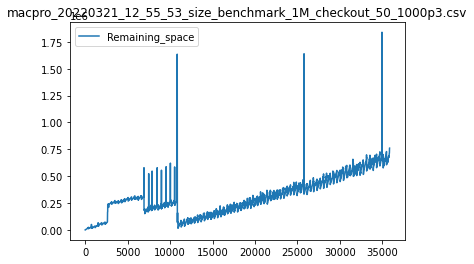

In [142]:
plot_file(size_benchmark,[ 'Remaining_space'])

item index Remaining_space = 0
first_val: 1786422720.0
got Remaining_space
item index Logic_Size = 1
got Logic_Size
item index DU_Size = 2
got DU_Size
item index Used_Size_df = 3
got Used_Size_df


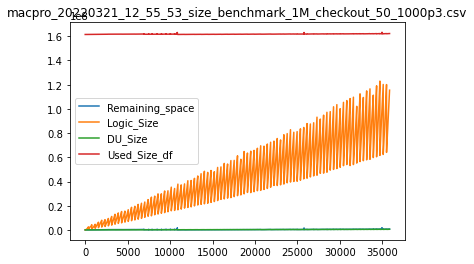

In [143]:
plot_file(size_benchmark)

In [144]:
get_header(size_benchmark)

['Remaining_space', 'Logic_Size', 'DU_Size', 'Used_Size_df']

item index Remaining_space = 0
first_val: 1786422720.0
item index Remaining_space = 0
first_val: 1784476328.0
item index Remaining_space = 0
first_val: 1786243728.0
item index Remaining_space = 0
first_val: 1798511024.0
item index Remaining_space = 0
first_val: 1799924520.0
item index Remaining_space = 0
first_val: 1798755256.0
item index Remaining_space = 0
first_val: 1800050248.0


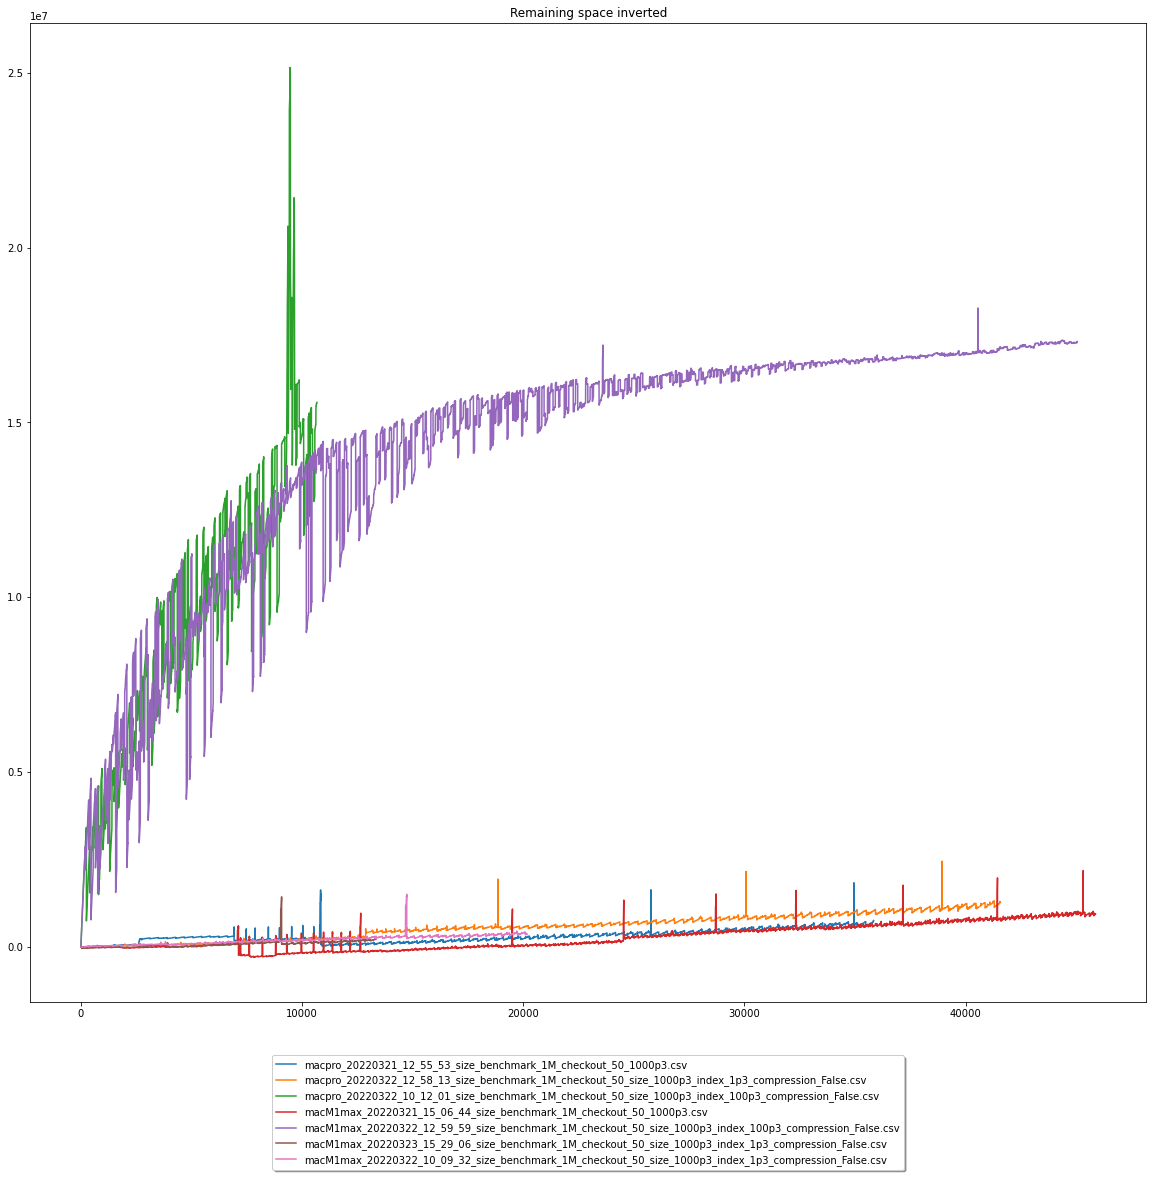

In [145]:
plot_all(title="Remaining space inverted",files=files_to_process,column='Remaining_space',filter_files='size_benchmark',output_file='all_remainng_space.png')


item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1
item index Logic_Size = 1


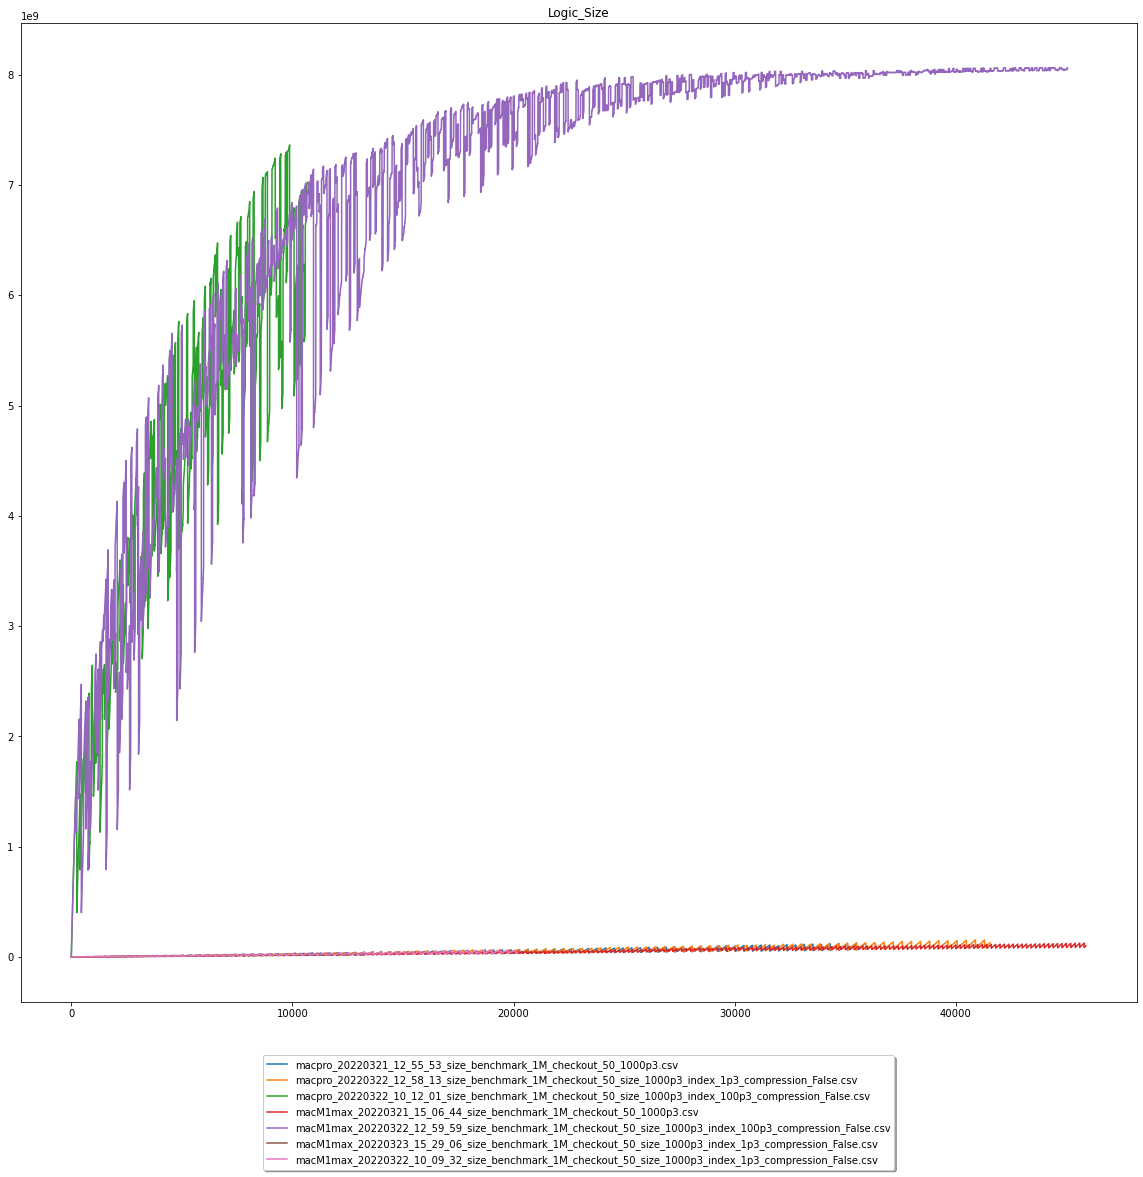

In [146]:

plot_all(title="Logic_Size",files=files_to_process,column='Logic_Size',filter_files='size_benchmark',output_file='Logic_Size.png')


item index DU_Size = 2
item index DU_Size = 2
Error DU_Size not found in benchmarks/v1/benchmaks_mac_16gb/22/macpro_20220322_10_12_01_size_benchmark_1M_checkout_50_size_1000p3_index_100p3_compression_False.csv
item index DU_Size = 2
item index DU_Size = 2
item index DU_Size = 2
Error DU_Size not found in benchmarks/v1/benchmark_mac64/22/macM1max_20220322_10_09_32_size_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv


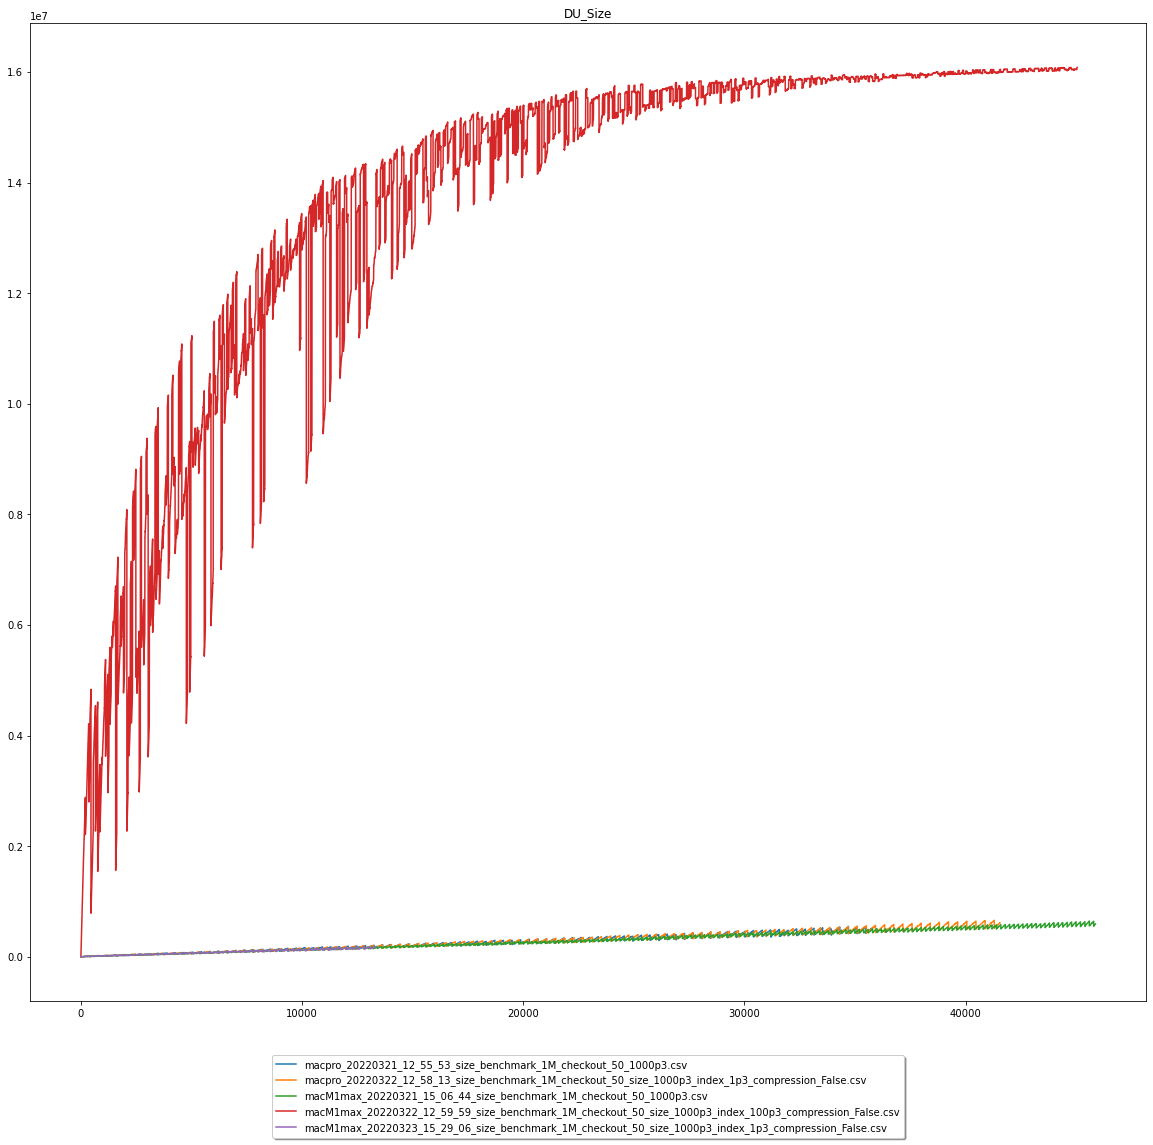

In [147]:
plot_all(title="DU_Size",files=files_to_process,column='DU_Size',filter_files='size_benchmark',output_file='DU_Size.png')

item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 2
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 3
item index Used_Size_df = 2


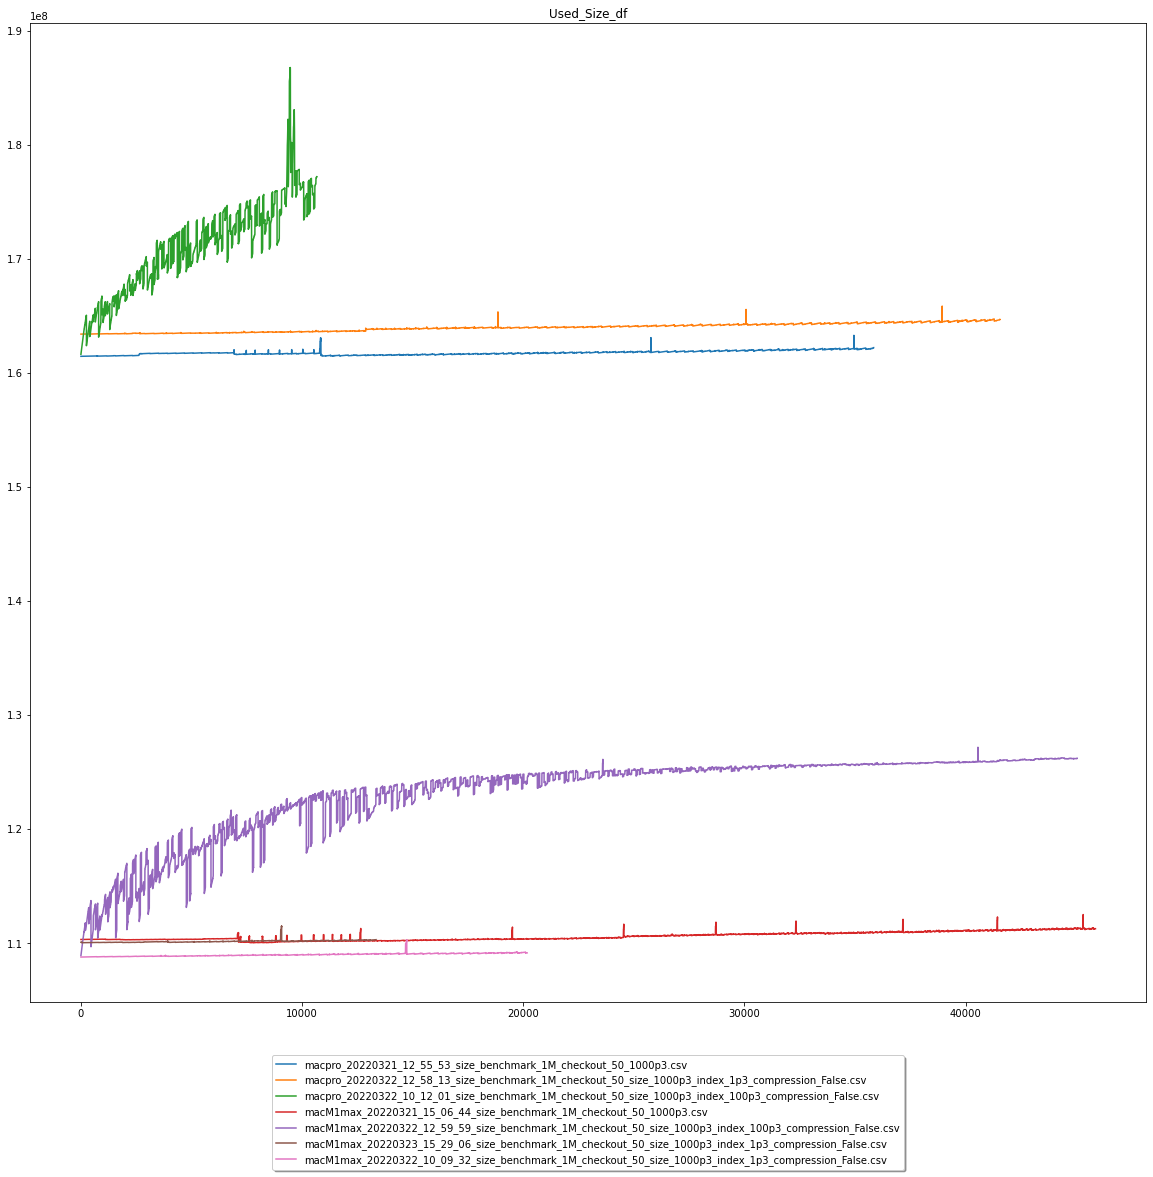

In [148]:

plot_all(title="Used_Size_df",files=files_to_process,column='Used_Size_df',filter_files='size_benchmark',output_file='Used_Size_df.png')


item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4
item index Commit_time = 4


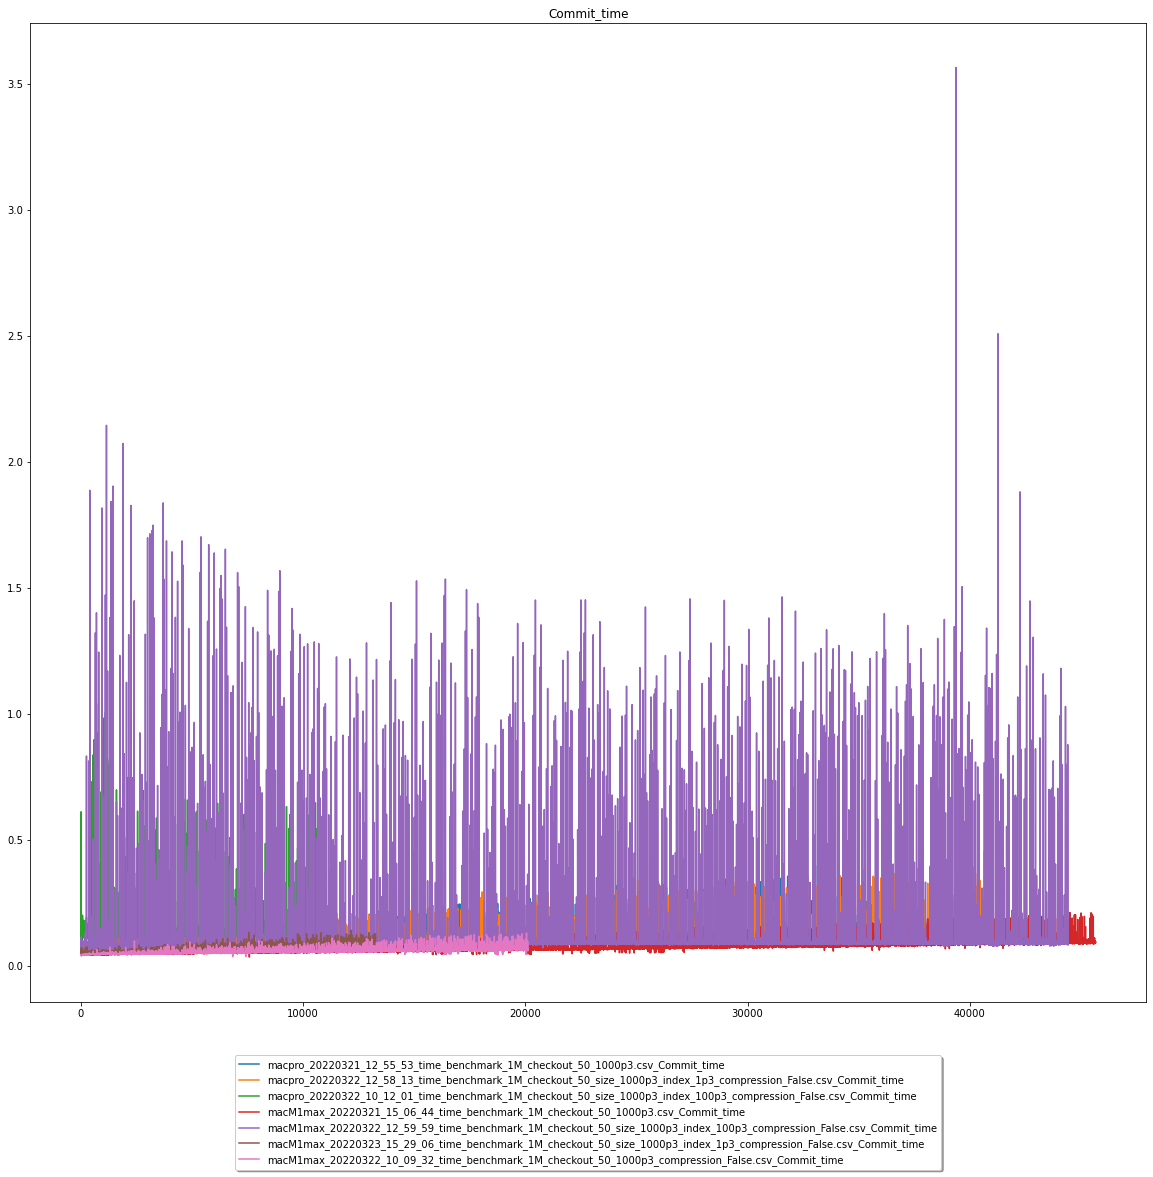

In [171]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Commit_time",files=files_to_process,columns=['Commit_time'],filter_files='time_benchmark',output_file='Commit_time.png')


In [112]:
# all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']
# all_files

In [168]:
get_row('benchmarks/v1/benchmaks_mac_16gb/22/macpro_20220322_10_12_01_time_benchmark_1M_checkout_50_size_1000p3_index_100p3_compression_False.csv',"Checkout_time")

item index Checkout_time = 5


(array([   50,   100,   150,   200,   250,   300,   350,   400,   450,
          500,   550,   600,   650,   700,   750,   800,   850,   900,
          950,  1000,  1050,  1100,  1150,  1200,  1250,  1300,  1350,
         1400,  1450,  1500,  1550,  1600,  1650,  1700,  1750,  1800,
         1850,  1900,  1950,  2000,  2050,  2100,  2150,  2200,  2250,
         2300,  2350,  2400,  2450,  2500,  2550,  2600,  2650,  2700,
         2750,  2800,  2850,  2900,  2950,  3000,  3050,  3100,  3150,
         3200,  3250,  3300,  3350,  3400,  3450,  3500,  3550,  3600,
         3650,  3700,  3750,  3800,  3850,  3900,  3950,  4000,  4050,
         4100,  4150,  4200,  4250,  4300,  4350,  4400,  4450,  4500,
         4550,  4600,  4650,  4700,  4750,  4800,  4850,  4900,  4950,
         5000,  5050,  5100,  5150,  5200,  5250,  5300,  5350,  5400,
         5450,  5500,  5550,  5600,  5650,  5700,  5750,  5800,  5850,
         5900,  5950,  6000,  6050,  6100,  6150,  6200,  6250,  6300,
      